In [10]:
# TO DO:
# FIX NA





# Import and init functions

In [72]:
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
from datetime import datetime
import numpy as np
import json
import os
import time
import string
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import re
import pickle
from operator import itemgetter
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import pylab
from sklearn import preprocessing



# Convert to epoch
def timeConvert(date):
	return time.mktime(datetime.strptime(date, '%Y-%m-%d').timetuple())
# Convert from epoch to Y-M-D
def timeInvert(epoch):
	return time.strftime('%Y-%m-%d', time.localtime(epoch))


# List of epoch times for iteration
start = []
timeTuples = []
for i in ["%.2d" % i for i in range(3,13)]:
	start.append('2015-'+i+'-01')
for idx, date in enumerate(start[:-1]):
	timeTuples.append((timeConvert(date),timeConvert(start[idx+1])))
timeTuples.append((timeConvert('2015-12-01'),timeConvert('2015-12-31')))

start = []
for i in ["%.2d" % i for i in range(1,13)]:
	start.append('2016-'+i+'-01')
for idx, date in enumerate(start[:-1]):
	timeTuples.append((timeConvert(date),timeConvert(start[idx+1])))
timeTuples.append((timeConvert('2016-12-01'),timeConvert('2016-12-31')))




# Cleaning

In [4]:

# Alpha-num, lowercase
def easy_clean(comment):
    comment = re.sub('[^A-Za-z ]+', '', comment['body']).lower().split(' ')
    #comment = [re.sub('[^A-Za-z]+', '', word) for word in comment]
    return comment

# nltk tokenize, stopwords
def nltk_clean(comment):
    #comment = comment
    #comment = nltk.sent_tokenize(comment)
    print(comment)
    comment = nltk.tokenize.word_tokenize(comment)
    comment = [word for word in comment if word.isalpha()]
    stop_words = nltk.corpus.stopwords.words('english')
    comment = [word for word in comment if word not in stop_words]
    return comment

# Remove quotes, clean text using translation table (punctuations)
def nltk2_clean(comment): #tokenize, removes case, remove special characters and numbers
    comment = [e for e in comment.splitlines() if e[:2] != '&g']
    comment = ' '.join(comment)
    comment = comment.split(' ')
    comment = [w.lower() for w in comment]
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in comment]
    words = [word for word in stripped if word.isalpha()]
    return ' '.join(words)

# Tokenize at sentence level, applies nltk2_clean on each sentence
def clean_sent(comment): #tokenize, removes case, remove special characters and numbers
    comment = comment['body']
    comments = nltk.sent_tokenize(comment)
    comments = [nltk2_clean(sent) for sent in comments]
    return comments


# Remove duplicates, create initial dataset

In [104]:
# Remove duplicates across dataSet
clSet = [] 
crSet = []
trSet = []
saSet = []

print('starter')
dataSet = []
start = time.time()
n = 0
for file in os.listdir('data/'):
    with open('data/'+file) as f:
        data = json.load(f)
    
    if file[:2] == 'cl':
        candidates =  ['bernie' ,'sanders' ,'donald' ,'trump' ,'ted' ,'cruz']
        #tempData = [e for e in data if not any(item in candidates for item in easy_clean(e))]
        clData = [[e,e['created_utc']] for e in data if not any(item in candidates for item in easy_clean(e))]
        clSet = clSet + clData
        
    elif file[:2] == 'cr':
        candidates =  ['bernie' ,'sanders' ,'donald' ,'trump', 'hillary', 'clinton']
        #tempData = [e for e in data if not any(item in candidates for item in easy_clean(e))]
        crData = [[e,e['created_utc']] for e in data if not any(item in candidates for item in easy_clean(e))]
        crSet = crSet + crData

    elif file[:2] == 'tr':
        candidates =  ['bernie' ,'sanders' ,'ted' ,'cruz', 'hillary', 'clinton']
        #tempData = [e for e in data if not any(item in candidates for item in easy_clean(e))]
        trData = [[e,e['created_utc']] for e in data if not any(item in candidates for item in easy_clean(e))]
        trSet = trSet + trData
        
    elif file[:2] == 'sa':
        candidates =  ['hillary', 'clinton' ,'donald' ,'trump' ,'ted' ,'cruz']
        #tempData = [e for e in data if not any(item in candidates for item in easy_clean(e))]
        saData = [[e,e['created_utc']] for e in data if not any(item in candidates for item in easy_clean(e))]
        saSet = saSet+saData
    print(file + '\ndone\n')
    
end = time.time()
print('...Done in '+str(end - start))



starter
clinton_politics_2015-03-01_2015-04-01.json
done

clinton_politics_2015-04-01_2015-05-01.json
done

clinton_politics_2015-05-01_2015-06-01.json
done

clinton_politics_2015-06-01_2015-07-01.json
done

clinton_politics_2015-07-01_2015-08-01.json
done

clinton_politics_2015-08-01_2015-09-01.json
done

clinton_politics_2015-09-01_2015-10-01.json
done

clinton_politics_2015-10-01_2015-11-01.json
done

clinton_politics_2015-11-01_2015-12-01.json
done

clinton_politics_2015-12-01_2015-12-31.json
done

clinton_politics_2016-01-01_2016-02-01.json
done

clinton_politics_2016-02-01_2016-03-01.json
done

clinton_politics_2016-03-01_2016-04-01.json
done

clinton_politics_2016-04-01_2016-05-01.json
done

clinton_politics_2016-05-01_2016-06-01.json
done

clinton_politics_2016-06-01_2016-07-01.json
done

clinton_politics_2016-07-01_2016-08-01.json
done

clinton_politics_2016-08-01_2016-09-01.json
done

clinton_politics_2016-09-01_2016-10-01.json
done

clinton_politics_2016-10-01_2016-11-01.jso

In [102]:
# Remove duplicates across dataSet
clSet = [] 
crSet = []
trSet = []
saSet = []

print('starter')
dataSet = []
start = time.time()
n = 0
for file in os.listdir('data/'):
    with open('data/'+file) as f:
        data = json.load(f)
    
    if file[:2] == 'cl':
        candidates =  ['bernie' ,'sanders' ,'donald' ,'trump' ,'ted' ,'cruz']
        #tempData = [e for e in data if not any(item in candidates for item in easy_clean(e))]
        clData = [e for e in data if not any(item in candidates for item in easy_clean(e))]
        clSet = clSet + clData
        
    elif file[:2] == 'cr':
        candidates =  ['bernie' ,'sanders' ,'donald' ,'trump', 'hillary', 'clinton']
        #tempData = [e for e in data if not any(item in candidates for item in easy_clean(e))]
        crData = [e for e in data if not any(item in candidates for item in easy_clean(e))]
        crSet = crSet + crData

    elif file[:2] == 'tr':
        candidates =  ['bernie' ,'sanders' ,'ted' ,'cruz', 'hillary', 'clinton']
        #tempData = [e for e in data if not any(item in candidates for item in easy_clean(e))]
        trData = [e for e in data if not any(item in candidates for item in easy_clean(e))]
        trSet = trSet + trData
        
    elif file[:2] == 'sa':
        candidates =  ['hillary', 'clinton' ,'donald' ,'trump' ,'ted' ,'cruz']
        #tempData = [e for e in data if not any(item in candidates for item in easy_clean(e))]
        saData = [e for e in data if not any(item in candidates for item in easy_clean(e))]
        saSet = saSet+saData
    print(file + '\ndone\n')
    
end = time.time()
print('...Done in '+str(end - start))



starter
clinton_politics_2015-03-01_2015-04-01.json
done

clinton_politics_2015-04-01_2015-05-01.json
done

clinton_politics_2015-05-01_2015-06-01.json
done

clinton_politics_2015-06-01_2015-07-01.json
done

clinton_politics_2015-07-01_2015-08-01.json
done

clinton_politics_2015-08-01_2015-09-01.json
done

clinton_politics_2015-09-01_2015-10-01.json
done

clinton_politics_2015-10-01_2015-11-01.json
done

clinton_politics_2015-11-01_2015-12-01.json
done

clinton_politics_2015-12-01_2015-12-31.json
done

clinton_politics_2016-01-01_2016-02-01.json
done

clinton_politics_2016-02-01_2016-03-01.json
done

clinton_politics_2016-03-01_2016-04-01.json
done

clinton_politics_2016-04-01_2016-05-01.json
done

clinton_politics_2016-05-01_2016-06-01.json
done

clinton_politics_2016-06-01_2016-07-01.json
done

clinton_politics_2016-07-01_2016-08-01.json
done

clinton_politics_2016-08-01_2016-09-01.json
done

clinton_politics_2016-09-01_2016-10-01.json
done

clinton_politics_2016-10-01_2016-11-01.jso

# Clean data and save/open

In [105]:
# Clean data
dataSet = [clSet, crSet, trSet, saSet]
dataSet = [[[clean_sent(comment[0]),comment[0]['created_utc']] for comment in candidate] for candidate in dataSet]


In [ ]:
# Save data
with open("nodupData", "wb") as fp:
    pickle.dump(dataSet, fp)

In [ ]:
with open(r"nodupData", "rb") as input_file:
    dataSet = pickle.load(input_file)
    

# Compute sentiment and commentScores

In [ ]:

analyzer = SIA()
sentScores = [[[[[sentence, analyzer.polarity_scores(sentence)['compound']] 
                 for sentence in comment[0] if len(sentence)>1],comment[1]]
               for comment in candidate]
              for candidate in dataSet]


In [ ]:

# Calculate average polarity score for each sentence in comment + comment in string format
commentScores = []
for candidate in sentScores:
    candidateScores = []
    for comment in candidate:
        sentence = '. '.join([sentence[0] for sentence in comment[0]])
        avg = np.mean([sentence[1] for sentence in comment[0]])
        stamp = comment[1]
        candidateScores.append([sentence, avg, stamp])
    commentScores.append(candidateScores)






In [108]:
# Save data
with open("commentScores_all", "wb") as fp:
    pickle.dump(commentScores, fp)

In [2]:
with open(r"commentScores_all", "rb") as input_file:
    commentScores = pickle.load(input_file)
    

In [14]:

# Convert to epoch
def timeConvert(date):
	return time.mktime(datetime.strptime(date, '%Y-%m-%d').timetuple())
# Convert from epoch to Y-M-D
def timeInvert(epoch):
	return time.strftime('%Y-%m-%d', time.localtime(epoch))


# List of epoch times for iteration
start = []
timeTuples = []
for i in ["%.2d" % i for i in range(3,13)]:
	start.append('2015-'+i+'-01')
for idx, date in enumerate(start[:-1]):
	timeTuples.append((timeConvert(date),timeConvert(start[idx+1])))
timeTuples.append((timeConvert('2015-12-01'),timeConvert('2015-12-31')))


start = []
for i in ["%.2d" % i for i in range(1,13)]:
	start.append('2016-'+i+'-01')
for idx, date in enumerate(start[:-1]):
	timeTuples.append((timeConvert(date),timeConvert(start[idx+1])))
timeTuples.append((timeConvert('2016-12-01'),timeConvert('2016-12-31')))



# Dataframes and Plots

In [6]:

pd.set_option('display.max_colwidth', -1)

hillaryScores = pd.DataFrame(commentScores[0])
cruzScores =pd.DataFrame(commentScores[1])
trumpScores =  pd.DataFrame(commentScores[2])
sandersScores =  pd.DataFrame(commentScores[3])

meanHillary = [np.mean(hillaryScores[(hillaryScores[2] > e[0]) & (hillaryScores[2] < e[1])][1]) for e in timeTuples]
meanCruz = [np.mean(cruzScores[(cruzScores[2] > e[0]) & (cruzScores[2] < e[1])][1]) for e in timeTuples]
meanTrump = [np.mean(trumpScores[(trumpScores[2] > e[0]) & (trumpScores[2] < e[1])][1]) for e in timeTuples]
meanSanders = [np.mean(sandersScores[(sandersScores[2] > e[0]) & (sandersScores[2] < e[1])][1]) for e in timeTuples]






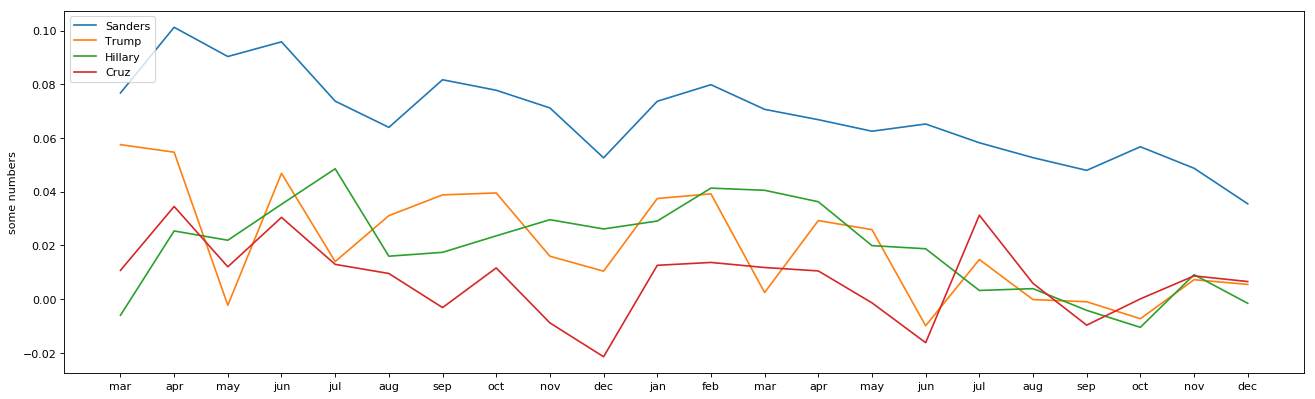

In [64]:
#times = [timeInvert(e[0])[:7] for e in timeTuples]
fig=plt.figure(figsize=(20, 6), dpi= 80, facecolor='w', edgecolor='k')

times = ['mar','apr','may','jun','jul','aug','sep','oct','nov','dec','jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
x = [e for e in range(len(times))]

plt.xticks(x, times)
plt.plot(meanSanders,label='Sanders')
plt.plot(meanTrump,label='Trump')
plt.plot(meanHillary,label='Hillary')
plt.plot(meanCruz,label='Cruz')
pylab.legend(loc='upper left')

plt.ylabel('some numbers')
plt.show()

# Stopwords and Word2Vec

# Mess

In [57]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)
test = pd.DataFrame(commentScores[1])





test2 = test[(test[2] < 1454280854) & (test[2] > 1454279996)]
test2 = test[test[1] > 0.96]

test

,0,1,2
0,hes a war hero that kind of stuff i think is below the gop. i dont think cruz will have the same immunity,-0.038600,1427301828
1,i dont think any of the want it but their naïveté in this agreement will surely allow iran to possess a nuke and that is the danger. none of senators committed an act of treason and you well know that. theres no e in ted cruz last name also,0.034100,1427168964
2,this article is horsehockey. cruz is merely buying private insurance on the open market. he makes too much money to be eligible for an obamacare subsidy,0.000000,1427257460
3,the key the people who follow cruz and the rest of the lunatics that run the republican party believe that the end times is coming soon. they have to establish dominion before that happens,0.012900,1427243912
4,im not challenging cruz eligibility. thats a tactic the gop used to attack obama and is was silly and petty. im concerned about how on earth a united states senator is unaware of his citizenship status in another nation. either hes completely oblivious or a liar,-0.250450,1427171782
5,im not even sure who in the republican field is the least damaging. their race seems wide open rand paul scott walker jeb bush maybe christie i could all see running but wouldnt surprise me if cruz or rubio. more dark horses in huckabee or rick perry their race seem so open but i dont like a single candidate. at least in the past i could stand mccain before he turned to campaign mode at least then hagel or huntsman after that. this time around i dont really like any of them even a little,-0.166420,1425259700
6,citation please,0.318200,1427246118
7,rafael edward cruz ted cruz. he wants to be king ralph,0.000000,1427306252
8,and we will continue because some republicans think tom cotton should be president. along with ted cruz jeb bush and rick perry,0.000000,1426342665
9,no body no murder. that will be what they say when asked why ted cruz raped and murdered a woman in,-0.859600,1427215630


In [50]:
import gensim

doc = "Hey girl. How are you doing? The constitutional crisis of the United States of America is upon us. Trump is a fool, Hillary is a sheep"

gensim.utils.simple_preprocess(doc, deacc=False, min_len=2, max_len=15)


['hey',
 'girl',
 'how',
 'are',
 'you',
 'doing',
 'the',
 'constitutional',
 'crisis',
 'of',
 'the',
 'united',
 'states',
 'of',
 'america',
 'is',
 'upon',
 'us',
 'trump',
 'is',
 'fool',
 'hillary',
 'is',
 'sheep']

# Timeline

In [3]:
pd.set_option('display.max_colwidth', -1)
with open('articles.json') as f:
    data = json.load(f)


articles = [article for day in data for article in day]
dfTemp = [[article[-1]['num_comments'], article[-1]['created_utc'], timeInvert(article[-1]['created_utc']), article[-1]['title'], article[-1]['url']] for article in articles]

articlesDf = pd.DataFrame(dfTemp)
newDf = articlesDf[(articlesDf[1] > timeConvert('2015-08-01')) & (articlesDf[1] < timeConvert('2015-09-01'))]

#articlesDf.sort_values(0, ascending=False)
#newDf.sort_values(0, ascending=False)


In [31]:
import matplotlib.dates as dates
import datetime as dt


dates = ['01/02/1991','01/03/1991','01/04/1991']
x = [dt.datetime.strptime(d,'%m/%d/%Y').date() for d in dates]
#y = range(len(x)) # many thanks to Kyss Tao for setting me straight here
y = ['a','b','c']




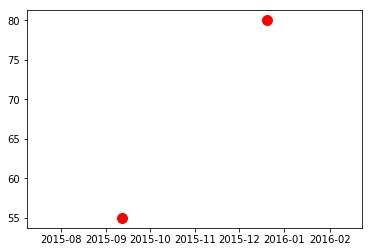

In [33]:
import pandas as pd
dates = ['2015-12-20','2015-09-12']  
PM_25 = [80, 55]
dates = [pd.to_datetime(d) for d in dates]

plt.scatter(dates, PM_25, s =100, c = 'red')

In [52]:
import os
from psaw import PushshiftAPI
import time
import datetime
import json
import time
import pprint

# Fetch using psaw
def fetch(sub, af, be):
	api = PushshiftAPI()
	gen =  api.search_submissions(subreddit=sub,
							   #limit=10,
							   after=af,
							   before=be,
							   #,filter=['body','created_utc']
							   )
	return list(gen)

topArticles = []
currDate = 1425164400
day = fetch('politics', str(currDate),str(currDate+24*60*60))

day.sort(key=lambda x: x.num_comments)
print(day[-1][-1]['num_comments'])




1201


1425254400

In [53]:
with open('articles.json') as f:
    data = json.load(f)
    


# Polls

In [57]:
#pollsDf = pd.read_csv('polls_new.csv')
pollsDf = pd.read_excel('polls.xlsx')

# Add new date formats Epoch and f_dates - Sort by date
dateList = [re.findall(r"[\w']+", e) for e in pollsDf['Date']]
dateList = [' '.join([e[1], e[0]+',', e[-1]]) for e in dateList]
dateList = [datetime.strptime(e, '%d %B, %Y') for e in dateList]
dateList = [e.strftime('%Y-%m-%d') for e in dateList]
pollsDf['f_dates'] = dateList
epochs = [timeConvert(e) for e in pollsDf['f_dates']]
pollsDf['epochs'] = epochs
pollsDf = pollsDf.sort_values(by=['f_dates'])

# Create vs. polls
pollClinTrump = pollsDf[(pollsDf['Democratic candidate'] == 'Hillary Clinton') & (pollsDf['Republican candidate'] == 'Donald Trump')]
pollClinCruz = pollsDf[(pollsDf['Democratic candidate'] == 'Hillary Clinton') & (pollsDf['Republican candidate'] == 'Ted Cruz')]
pollSanTrump =  pollsDf[(pollsDf['Democratic candidate'] == 'Bernie Sanders') & (pollsDf['Republican candidate'] == 'Donald Trump')]
pollSanCruz = pollsDf[(pollsDf['Democratic candidate'] == 'Bernie Sanders') & (pollsDf['Republican candidate'] == 'Ted Cruz')]

# Sentiments plotted (Hillary, Trump)

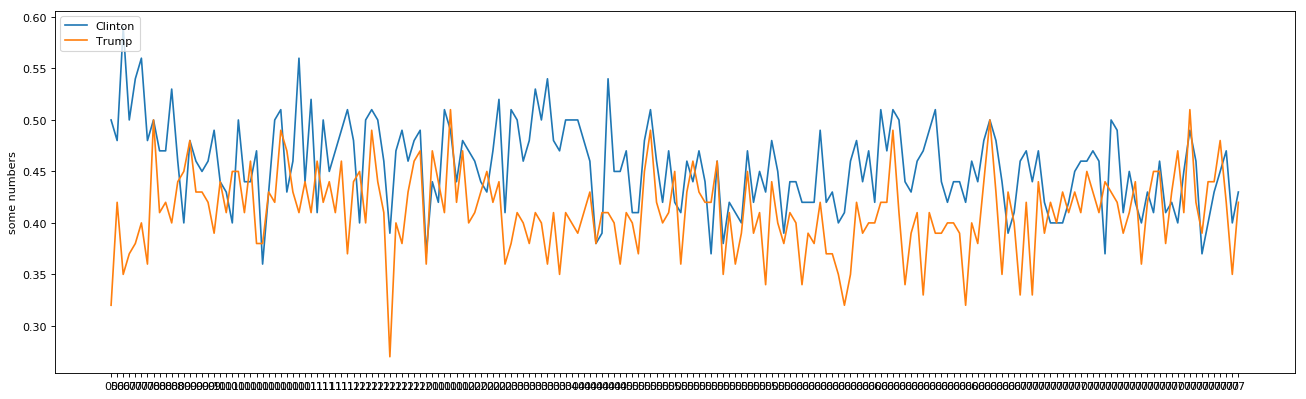

In [117]:
fig=plt.figure(figsize=(20, 6), dpi= 80, facecolor='w', edgecolor='k')

times = ['mar','apr','may','jun','jul','aug','sep','oct','nov','dec','jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
times = [e[5:7] for e in pollClinTrump['f_dates']]
x = [e for e in range(len(times))]
plt.xticks(x, times)

plt.plot(pollClinTrump['%'].values,label='Clinton')
plt.plot(pollClinTrump['%.1'].values,label='Trump')

pylab.legend(loc='upper left')

plt.ylabel('some numbers')
plt.show()

# Create mean poll data for plots

In [227]:
# Tuples for dataframe iteration by month
monthTuples = [["2015-03-01",  "2015-04-01"], ["2015-04-01",  "2015-05-01"], ["2015-05-01",  "2015-06-01"], ["2015-06-01",  "2015-07-01"], ["2015-07-01",  "2015-08-01"], ["2015-08-01",  "2015-09-01"], ["2015-09-01",  "2015-10-01"], ["2015-10-01",  "2015-11-01"], ["2015-11-01",  "2015-12-01"], ["2015-12-01",  "2016-01-01"], ["2016-01-01",  "2016-02-01"], ["2016-02-01",  "2016-03-01"], ["2016-03-01",  "2016-04-01"], ["2016-04-01",  "2016-05-01"], ["2016-05-01",  "2016-06-01"], ["2016-06-01",  "2016-07-01"], ["2016-07-01",  "2016-08-01"], ["2016-08-01",  "2016-09-01"], ["2016-09-01",  "2016-10-01"], ["2016-10-01",  "2016-11-01"], ["2016-11-01",  "2016-12-01"], ["2016-12-01",  "2017-01-01"]]


# Monthly mean polls for Clinton and Trump
mClTr = [[np.mean(pollClinTrump[(pollClinTrump['epochs'] > timeConvert(e[0])) & (pollClinTrump['epochs'] < timeConvert(e[1]))]['%']),
         np.mean(pollClinTrump[(pollClinTrump['epochs'] > timeConvert(e[0])) & (pollClinTrump['epochs'] < timeConvert(e[1]))]['%.1']), e[0][:-3]] for e in monthTuples]


# Monthly mean polls for Clinton and Cruz
mClCr = [[np.mean(pollClinCruz[(pollClinCruz['epochs'] > timeConvert(e[0])) & (pollClinCruz['epochs'] < timeConvert(e[1]))]['%']),
         np.mean(pollClinCruz[(pollClinCruz['epochs'] > timeConvert(e[0])) & (pollClinCruz['epochs'] < timeConvert(e[1]))]['%.1']), e[0][:-3]] for e in monthTuples]

# Monthly mean polls for Sanders and Trump
mSaTr = [[np.mean(pollSanTrump[(pollSanTrump['epochs'] > timeConvert(e[0])) & (pollSanTrump['epochs'] < timeConvert(e[1]))]['%']),
         np.mean(pollSanTrump[(pollSanTrump['epochs'] > timeConvert(e[0])) & (pollSanTrump['epochs'] < timeConvert(e[1]))]['%.1']), e[0][:-3]] for e in monthTuples]

    
# Monthly mean polls for Sanders and Cruz
mSaCr = [[np.mean(pollSanCruz[(pollSanCruz['epochs'] > timeConvert(e[0])) & (pollSanCruz['epochs'] < timeConvert(e[1]))]['%']),
         np.mean(pollSanCruz[(pollSanCruz['epochs'] > timeConvert(e[0])) & (pollSanCruz['epochs'] < timeConvert(e[1]))]['%.1']), e[0][:-3]] for e in monthTuples]




# Hillary vs. Trump - subplots

<Figure size 1600x480 with 0 Axes>

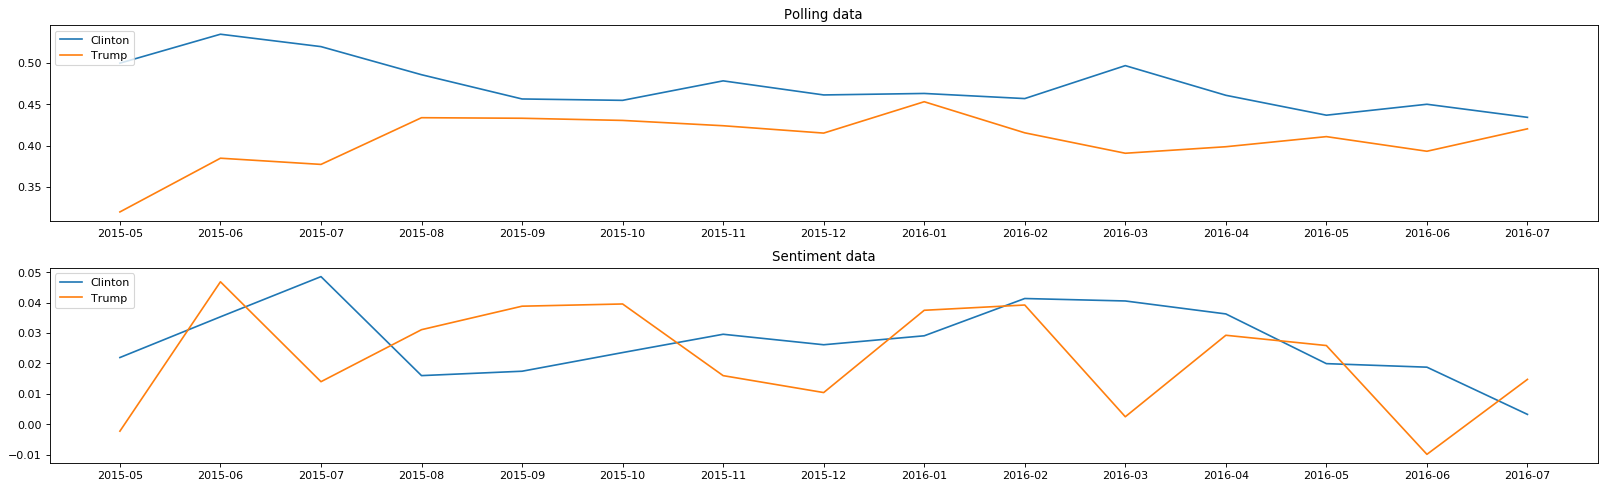

In [171]:
#times = ['mar','apr','may','jun','jul','aug','sep','oct','nov','dec','jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']

# Define x axis
times = [e[2] for e in mClTr[2:17]]
x = [e for e in range(len(times))]

# Mean polling for Hillary and Trump, monthly
pHillary = [e[0] for e in mClTr][2:17]
pTrump = [e[1] for e in mClTr][2:17]

# Mean sentiment for Hillary and Trump, monthly
sHillary = meanHillary[2:17]
sTrump = meanTrump[2:17]

# Normalized mean poll
npHillary = preprocessing.normalize([pHillary])[0]
npTrump = preprocessing.normalize([pTrump])[0]

# Normalized mean sentiment
nsHillary = preprocessing.normalize([sHillary])[0]
nsTrump = preprocessing.normalize([sTrump])[0]

# Plot
fig=plt.figure(figsize=(20, 6), dpi= 80, facecolor='w', edgecolor='k')
fig, axs = plt.subplots(2, 1, constrained_layout=True, figsize=(20, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.setp(axs, xticks=x, xticklabels=times)

# Subplot 1
axs[0].title.set_text('Polling data')
axs[0].plot(pHillary,label='Clinton')
axs[0].plot(pTrump,label='Trump')
axs[0].legend(loc='upper left')

# Subplot 2
axs[1].title.set_text('Sentiment data')
axs[1].plot(sHillary,label='Clinton')
axs[1].plot(sTrump,label='Trump')
axs[1].legend(loc='upper left')


# Hillary vs. Cruz - subplots

In [216]:
import math

adf = np.mean([pd.DataFrame(mClCr[:-8]).fillna(0).values.tolist()
adf

#for l in mClCr[:-8]:
#    print(l[0],type(l[0]))
    


[[0.51, 0.41333333333333333, '2015-03'],
 [0.5049999999999999, 0.39249999999999996, '2015-04'],
 [0.49333333333333335, 0.41, '2015-05'],
 [0.48, 0.42, '2015-06'],
 [0.485, 0.4, '2015-07'],
 [0.525, 0.43999999999999995, '2015-08'],
 [0.0, 0.0, '2015-09'],
 [0.495, 0.44249999999999995, '2015-10'],
 [0.47714285714285715, 0.4257142857142857, '2015-11'],
 [0.4640000000000001, 0.44000000000000006, '2015-12'],
 [0.454, 0.4619999999999999, '2016-01'],
 [0.45166666666666666, 0.4583333333333333, '2016-02'],
 [0.4655555555555556, 0.4322222222222222, '2016-03'],
 [0.45333333333333337, 0.43333333333333335, '2016-04']]

<Figure size 1600x480 with 0 Axes>

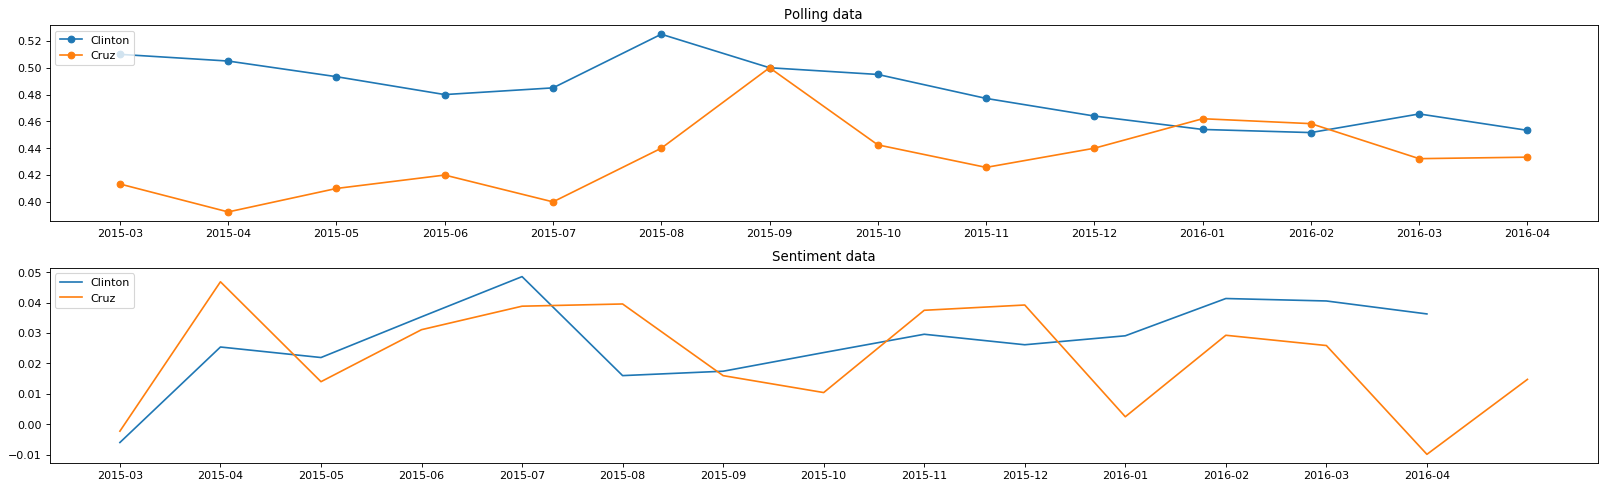

In [226]:
# No Polling data for september 2015 for Cruz, Clinton - nan replaced with zero:

#mClCr = pd.DataFrame(mClCr).fillna(0.5).values.tolist()


# Define x axis
times = [e[2] for e in mClCr[:-8]]
x = [e for e in range(len(times))]

# Mean polling for Hillary and Trump, monthly
pHillary = [e[0] for e in mClCr][:-8]
pCruz = [e[1] for e in mClCr][:-8]

# Mean sentiment for Hillary and Trump, monthly
sHillary = meanHillary[:-8]
sCruz = meanCruz[:-8]

# Normalized mean poll
npHillary = preprocessing.normalize([pHillary])[0]
npCruz = preprocessing.normalize([pCruz])[0]

# Normalized mean sentiment
nsHillary = preprocessing.normalize([sHillary])[0]
nsCruz = preprocessing.normalize([sCruz])[0]

# Plot
fig=plt.figure(figsize=(20, 6), dpi= 80, facecolor='w', edgecolor='k')
fig, axs = plt.subplots(2, 1, constrained_layout=True, figsize=(20, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.setp(axs, xticks=x, xticklabels=times)

# Subplot 1
axs[0].title.set_text('Polling data')
axs[0].plot(pHillary,label='Clinton', linestyle='-', marker='o')

axs[0].plot(pCruz,label='Cruz', linestyle='-', marker='o')
axs[0].legend(loc='upper left')

# Subplot 2
axs[1].title.set_text('Sentiment data')
axs[1].plot(sHillary,label='Clinton')
axs[1].plot(sTrump,label='Cruz')
axs[1].legend(loc='upper left')

# Single plot (poll and sentiment)

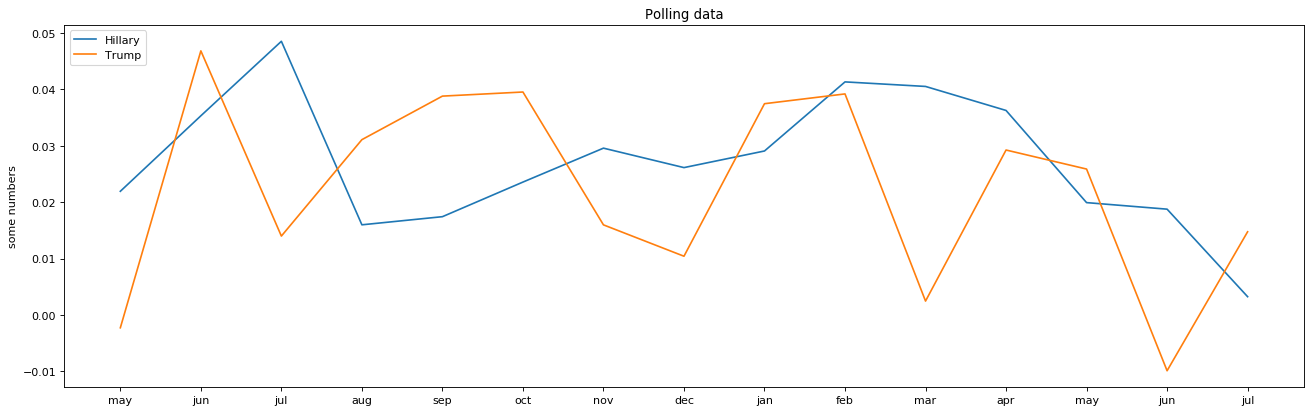

In [112]:
#times = [timeInvert(e[0])[:7] for e in timeTuples]
fig=plt.figure(figsize=(20, 6), dpi= 80, facecolor='w', edgecolor='k')

times = ['mar','apr','may','jun','jul','aug','sep','oct','nov','dec','jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
times = times[2:17]
x = [e for e in range(len(times))]

plt.xticks(x, times)

scaler = preprocessing.StandardScaler()
scaled = scaler.fit_transform([meanTrump[2:17],[e[1] for e in mClTr][2:17]])


mHillary = meanHillary[2:17]
mTrump = meanTrump[2:17]

sHillary = [e[0] for e in mClTr][2:17]
sTrump = [e[1] for e in mClTr][2:17]

nmHillary = preprocessing.normalize([mHillary])[0]
nmTrump = preprocessing.normalize([mTrump])[0]

nsHillary = preprocessing.normalize([sHillary])[0]
nsTrump = preprocessing.normalize([sTrump])[0]
#b = preprocessing.normalize([meanTrump[2:17]])[0]
#c = preprocessing.normalize([[e[1] for e in mClTr][2:17]])[0]



plt.plot(mHillary,label='Hillary')
plt.plot(mTrump,label='Trump')



pylab.legend(loc='upper left')
plt.title('Polling data')
plt.ylabel('some numbers')
plt.show()

# Rod

In [ ]:
# Word 2 Vec

stopWords = ["a","about","above","after","again","against","ain","all","am","an","and","any","are","aren","aren't","as","at","be","because","been","before","being","below","between","both","but","by","can","couldn","couldn't","d","did","didn","didn't","do","does","doesn","doesn't","doing","don","don't","down","during","each","few","for","from","further","had","hadn","hadn't","has","hasn","hasn't","have","haven","haven't","having","he","her","here","hers","herself","him","himself","his","how","i","if","in","into","is","isn","isn't","it","it's","its","itself","just","ll","m","ma","me","mightn","mightn't","more","most","mustn","mustn't","my","myself","needn","needn't","no","nor","not","now","o","of","off","on","once","only","or","other","our","ours","ourselves","out","over","own","re","s","same","shan","shan't","she","she's","should","should've","shouldn","shouldn't","so","some","such","t","than","that","that'll","the","their","theirs","them","themselves","then","there","these","they","this","those","through","to","too","under","until","up","ve","very","was","wasn","wasn't","we","were","weren","weren't","what","when","where","which","while","who","whom","why","will","with","won","won't","wouldn","wouldn't","y","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves","could","he'd","he'll","he's","here's","how's","i'd","i'll","i'm","i've","let's","ought","she'd","she'll","that's","there's","they'd","they'll","they're","they've","we'd","we'll","we're","we've","what's","when's","where's","who's","why's","would","able","abst","accordance","according","accordingly","across","act","actually","added","adj","affected","affecting","affects","afterwards","ah","almost","alone","along","already","also","although","always","among","amongst","announce","another","anybody","anyhow","anymore","anyone","anything","anyway","anyways","anywhere","apparently","approximately","arent","arise","around","aside","ask","asking","auth","available","away","awfully","b","back","became","become","becomes","becoming","beforehand","begin","beginning","beginnings","begins","behind","believe","beside","besides","beyond","biol","brief","briefly","c","ca","came","cannot","can't","cause","causes","certain","certainly","co","com","come","comes","contain","containing","contains","couldnt","date","different","done","downwards","due","e","ed","edu","effect","eg","eight","eighty","either","else","elsewhere","end","ending","enough","especially","et","etc","even","ever","every","everybody","everyone","everything","everywhere","ex","except","f","far","ff","fifth","first","five","fix","followed","following","follows","former","formerly","forth","found","four","furthermore","g","gave","get","gets","getting","give","given","gives","giving","go","goes","gone","got","gotten","h","happens","hardly","hed","hence","hereafter","hereby","herein","heres","hereupon","hes","hi","hid","hither","home","howbeit","however","hundred","id","ie","im","immediate","immediately","importance","important","inc","indeed","index","information","instead","invention","inward","itd","it'll","j","k","keep","keeps","kept","kg","km","know","known","knows","l","largely","last","lately","later","latter","latterly","least","less","lest","let","lets","like","liked","likely","line","little","'ll","look","looking","looks","ltd","made","mainly","make","makes","many","may","maybe","mean","means","meantime","meanwhile","merely","mg","might","million","miss","ml","moreover","mostly","mr","mrs","much","mug","must","n","na","name","namely","nay","nd","near","nearly","necessarily","necessary","need","needs","neither","never","nevertheless","new","next","nine","ninety","nobody","non","none","nonetheless","noone","normally","nos","noted","nothing","nowhere","obtain","obtained","obviously","often","oh","ok","okay","old","omitted","one","ones","onto","ord","others","otherwise","outside","overall","owing","p","page","pages","part","particular","particularly","past","per","perhaps","placed","please","plus","poorly","possible","possibly","potentially","pp","predominantly","present","previously","primarily","probably","promptly","proud","provides","put","q","que","quickly","quite","qv","r","ran","rather","rd","readily","really","recent","recently","ref","refs","regarding","regardless","regards","related","relatively","research","respectively","resulted","resulting","results","right","run","said","saw","say","saying","says","sec","section","see","seeing","seem","seemed","seeming","seems","seen","self","selves","sent","seven","several","shall","shed","shes","show","showed","shown","showns","shows","significant","significantly","similar","similarly","since","six","slightly","somebody","somehow","someone","somethan","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specifically","specified","specify","specifying","still","stop","strongly","sub","substantially","successfully","sufficiently","suggest","sup","sure","take","taken","taking","tell","tends","th","thank","thanks","thanx","thats","that've","thence","thereafter","thereby","thered","therefore","therein","there'll","thereof","therere","theres","thereto","thereupon","there've","theyd","theyre","think","thou","though","thoughh","thousand","throug","throughout","thru","thus","til","tip","together","took","toward","towards","tried","tries","truly","try","trying","ts","twice","two","u","un","unfortunately","unless","unlike","unlikely","unto","upon","ups","us","use","used","useful","usefully","usefulness","uses","using","usually","v","value","various","'ve","via","viz","vol","vols","vs","w","want","wants","wasnt","way","wed","welcome","went","werent","whatever","what'll","whats","whence","whenever","whereafter","whereas","whereby","wherein","wheres","whereupon","wherever","whether","whim","whither","whod","whoever","whole","who'll","whomever","whos","whose","widely","willing","wish","within","without","wont","words","world","wouldnt","www","x","yes","yet","youd","youre","z","zero","a's","ain't","allow","allows","apart","appear","appreciate","appropriate","associated","best","better","c'mon","c's","cant","changes","clearly","concerning","consequently","consider","considering","corresponding","course","currently","definitely","described","despite","entirely","exactly","example","going","greetings","hello","help","hopefully","ignored","inasmuch","indicate","indicated","indicates","inner","insofar","it'd","keep","keeps","novel","presumably","reasonably","second","secondly","sensible","serious","seriously","sure","t's","third","thorough","thoroughly","three","well","wonder", "shouldnt", "isnt", "havent", "mere"]
start = time.time()    
model = gensim.models.Word2Vec(
        a,
        size=150,
        window=10,
        min_count=2,
        workers=10, 
        iter=10)

model = gensim.models.Word2Vec (documents, size=150, window=10, min_count=2, workers=10)


end = time.time()
print('...Done in '+str(end - start))

model.train(a,total_examples=len(a),epochs=10)
model.wv.most_similar(positive='hillary', topn=50)